In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


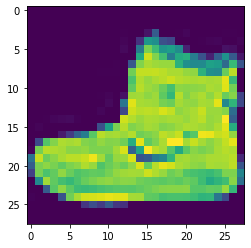

In [4]:
# 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요
plt.imshow(train_images[0])#,cmap='gray')
plt.show()

In [5]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.
train_images.dtype

dtype('uint8')

In [6]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.
print('train images, labels  min,max')
print(train_images.min(), train_images.max())
print(train_labels.min(), train_labels.max())

print('test images, labels  min,max')
print(test_images.min(), test_images.max())
print(test_labels.min(), test_labels.max())


train images, labels  min,max
0 255
0 9
test images, labels  min,max
0 255
0 9


In [7]:
# train/test 데이터의 타입을 dtype으로 확인해보고 실수형으로 전환하는 코드를 작성하세요.
def dtype_to_float(data):
    data = data.astype(np.float64)
    return data.dtype, data
    

In [8]:
dtype_to_float(train_images)

(dtype('float64'),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0.,

In [9]:
dtype_to_float(train_labels)

(dtype('float64'), array([9., 0., 0., ..., 3., 0., 5.]))

In [10]:
dtype_to_float(test_images)

(dtype('float64'),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0.,

In [11]:
dtype_to_float(test_labels)

(dtype('float64'), array([9., 2., 1., ..., 8., 1., 5.]))

In [12]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
# 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요. 
train_images.min(), train_images.max()

(0.0, 1.0)

In [14]:
test_images.min(),test_images.max()

(0.0, 1.0)

In [15]:
min(train_images.reshape(-1)),max(train_images.reshape(-1))

(0.0, 1.0)

In [16]:
train_images.dtype

dtype('float64')

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
# (배치, 28, 28)의 흑백 shape을 (배치, 28, 28, 3)의 칼라 shape의 영역으로 확대하는 코드를 추가하세요.
from skimage import color
train_images = color.gray2rgb(train_images)
test_images= color.gray2rgb(test_images)

# train_images=np.array([color.gray2rgb(img) for img in train_images])

train_images.shape, test_images.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [19]:
# (60000, 28, 28, 3)인 train_images에서 (5, 28, 28, 3)을 획득하는 코드를 작성하세요.
train_images[:5].shape

(5, 28, 28, 3)

In [20]:
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose((1,0,2,3)).reshape((28,-1,3)).shape

(28, 140, 3)

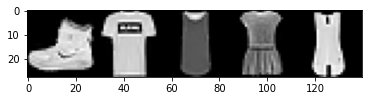

In [21]:
# (28, 140, 3)의 이미지를 plt로 출력해보세요.
plt.imshow(train_images[:5].transpose((1,0,2,3)).reshape((28,-1,3)))
plt.show()


In [22]:
# np.random.ranodm을 이용해서 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성하시오.
np.random.random(3)

array([0.86024953, 0.32717213, 0.62542333])

In [23]:
# np.random.random 함수와 shape 파라매터를 이용하여 (28, 28, 3)의 랜덤 노이즈를 생성하는 코드를 작성하시오.
np.random.random((28,28,3)).shape

(28, 28, 3)

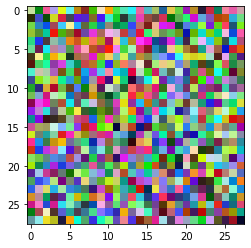

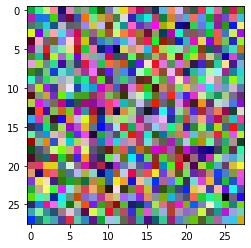

In [24]:
# plt를 통하여 random (28, 28, 3) 노이즈를 2회 출력하는 코드를 작성하시고, 이미지가 다른지 확인하세요.

for i in range(2):
    plt.imshow(np.random.random((28,28,3)))
    plt.show()

In [25]:
# 가우시안 노이즈 함수를 이용하여 mu 0.1 std 0.1 size 1인 랜덤값을 3번 출력하는 코드를 작성하세요.
for i in range(3):
    print(np.random.normal(loc=0.1, scale=0.1, size =1))

[0.15539735]
[0.10802884]
[0.16659309]


In [26]:
# 가우시안 노이즈 함수 mu = 3.0, std = 0.1, size = 1을 3 회 출력, 
# mu = 0.0, std = 0.01, size = 1을 3회 출력하는 코드를 작성해보세요.

for _ in range(3):
    print(np.random.normal(3, 0.1, 1))
    print(np.random.normal(0,0.01, 1))


[3.13297371]
[0.00293571]
[2.9609374]
[0.00697953]
[2.90652795]
[0.00466021]


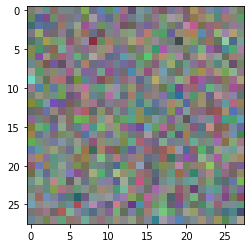

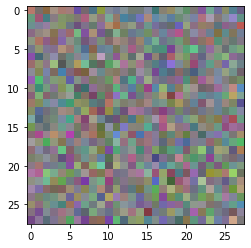

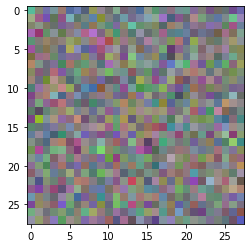

In [27]:
# 가우시안 노이즈 함수를 방금 위의 문제를 옵션으로 size를 (28, 28, 3)로 생성 후 
# plt로 출력하는 코드를 작성해보세요.
# 단 mu = 0.5,std= 0.1,size 픽셀크기

for i in range(3):
    plt.imshow(np.random.normal(0.5, 0.1, (28,28,3)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


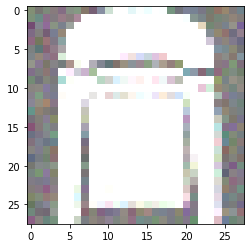

In [28]:
# train_images[5]와 가우시안 노이즈 (28, 28, 3)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.05
train_images[5] = train_images[5]+ np.random.normal(0.5, 0.05, (28,28,3))
plt.imshow(train_images[5])
plt.show()

In [29]:
# train_noisy_image와 test_nosiy_images를 생성하는 코드를 작성하세요.
train_noisy_images = train_images+np.random.normal(0.5, 0.05, (28,28,3))
train_noisy_images[train_noisy_images>1.0] = 1.0
test_noisy_images = test_images+np.random.normal(0.5, 0.05, (28,28,3))
test_noisy_images[test_noisy_images>1.0] = 1.0

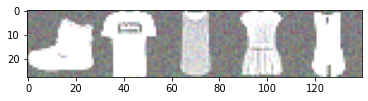

In [30]:
# 노이즈가 추가된 train_noisy_images에서 5장을 plt으로 출력하는 코드를 작성하세요.
# for i in range(5):
#     plt.imshow(train_noisy_images[i])
#     plt.show()
plt.imshow(train_noisy_images[:5].transpose((1,0,2,3)).reshape((28,-1,3)))
plt.show()

# Modeling

In [31]:
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model

In [32]:
# input (28, 28, 3), output (28, 28, 3)을 처리할 수 있는 모래시계 모양의 모델을 작성하세요.
# autoencoder

inputs = Input(shape=(28,28,3))

x = Conv2D(32,3,2, activation='relu',padding = 'same')(inputs)
x = Conv2D(64,3,2, activation='relu',padding = 'same')(x)
x = Flatten()(x)
latent = Dense(10)(x)

x = Dense(7*7*64)(latent)
x = Reshape((7,7,64))(x)

x = Conv2DTranspose(64,3,2, activation='relu',padding = 'same')(x)
x = Conv2DTranspose(32,3,2, activation='relu',padding = 'same')(x)
x = Conv2DTranspose(3,3, activation='sigmoid',padding = 'same')(x)


model = Model(inputs,x)




In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0     

In [34]:
# 만든 모델에 loss는 mse, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'] )

In [35]:
train_noisy_images.shape, test_noisy_images.shape
train_noisy_images.dtype

dtype('float64')

In [36]:
# train_noisy_images를 학습시키고 5 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.
hist = model.fit(train_noisy_images, 
                 train_images, 
                 validation_data=(test_noisy_images, 
                                  test_images), 
                 epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 10s - loss: 0.0288 - accuracy: 0.2748 - val_loss: 0.0467 - val_accuracy: 0.2349
Epoch 2/5
1875/1875 - 6s - loss: 0.0170 - accuracy: 0.2692 - val_loss: 0.0582 - val_accuracy: 0.2854
Epoch 3/5
1875/1875 - 5s - loss: 0.0155 - accuracy: 0.2934 - val_loss: 0.0632 - val_accuracy: 0.3175
Epoch 4/5
1875/1875 - 5s - loss: 0.0148 - accuracy: 0.3029 - val_loss: 0.0629 - val_accuracy: 0.3121
Epoch 5/5
1875/1875 - 5s - loss: 0.0142 - accuracy: 0.3111 - val_loss: 0.0677 - val_accuracy: 0.3348


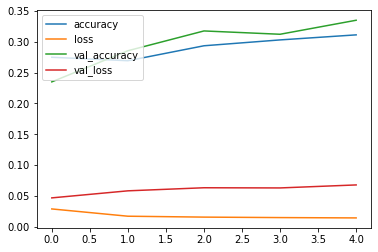

In [37]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc = 'upper left')
plt.show()

In [38]:
# 모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.

res = model.predict(test_noisy_images[0:1])
res.shape

(1, 28, 28, 3)

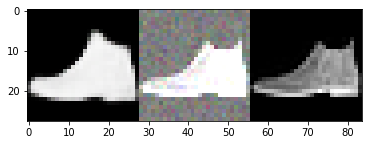

In [49]:
# res와 test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 (28, 28 * 3, 3) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.
plt.imshow(np.concatenate([res[0], test_noisy_images[0],test_images[0]],axis=1))
plt.show()

In [44]:
loss, accuracy = model.evaluate(test_noisy_images, test_images,verbose=1)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.3348
0.06774637848138809 0.33482372760772705


In [46]:
five = model.predict(test_noisy_images[:5])

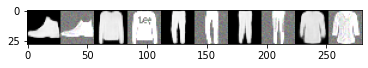

In [47]:
result = np.concatenate([five, test_noisy_images[:5]],axis=2).transpose((1, 0, 2, 3)).reshape((28, -1 ,3))
plt.imshow(result)
plt.show()

In [48]:
result.shape

(28, 280, 3)